## Phase retrieval via image registration
-----------

In [1]:
import numpy as np
import phasereg as pr
from numpy.fft import fft2, ifft2, fftshift
from matplotlib import pylab as plt
%matplotlib inline

---------------
### Setup problem:

In [2]:
#image creation
M,N = sh = (100,100)
img0 = pr.utils.image_creation.rectangle(sh, widths=[10,10], smooth=1, angle=0)
img1 = pr.utils.image_creation.rectangle(sh, widths=[20,4], smooth=1, angle=45)

#create far-field data
noise = 10.0
max_signal = 1e4
I = np.abs(fft2(fftshift(img1), norm='ortho'))**2
I = max_signal*I/I.max()
g = np.sqrt(I + noise*np.random.rand(img0.size).reshape(sh))
I1 = fftshift(g)

#zero-forms
I0 = pr.Form(0, array=img0)
I1 = pr.Form(0, array=I1)

#RKHS kernels
K0 = pr.KHelmholtz(2e-2, 1.0)
K1 = pr.KHelmholtz(5e-3, 1.0)

#step sizes:
step_size = pr.StepSize(N, vmax=1.0/(N*10.0), approach='initial')
step_size2 = pr.StepSize(N, vmax=1.0/(N*100.0), approach='initial')

---------------------
### Registration:


In [3]:
lddmm = pr.LDDMM_CDI_CC(I0, I1, K1, step_num=5)

In [4]:
lddmm.run(500, step_size=step_size, K=K0, save=20)

In [5]:
lddmm.run(500, step_size=step_size2, K=K1, save=20)

------------
### Show results

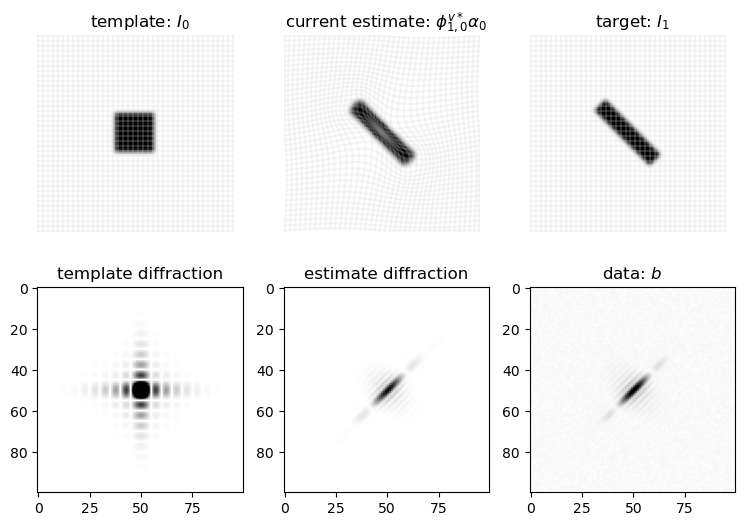

In [6]:
plt.figure(figsize=(9,6))
plt.subplot(2,3,1)
plt.imshow(lddmm.I0, cmap="gray_r")
pr.show_grid(lddmm.phis0[0], 40, alpha=0.2, color="lightgray")
plt.title(r"template: $I_0$")
plt.subplot(2,3,4)
plt.imshow(fftshift(np.abs(fft2(fftshift(lddmm.I0)))), vmax=1e2, cmap="gray_r")
plt.title("template diffraction")
plt.subplot(2,3,2)
plt.imshow(lddmm.Js0[-1], cmap="gray_r")
plt.title(r'current estimate: $\phi_{1,0}^{v *} \alpha_0$')
pr.show_grid(lddmm.phis1[0], 40, alpha=0.2, color="lightgray")
plt.subplot(2,3,5)
plt.imshow(fftshift(np.abs(fft2(fftshift(lddmm.Js0[-1])))), cmap="gray_r")
plt.title("estimate diffraction")
plt.subplot(2,3,3)
plt.imshow(img1, cmap="gray_r")
plt.title(r"target: $I_1$")
pr.show_grid(lddmm.phis0[0], 40, alpha=0.2, color="lightgray")
plt.subplot(2,3,6)
plt.imshow(fftshift(lddmm.I1), vmax=lddmm.I1.max()*0.9, cmap="gray_r")
plt.title(r"data: $b$");

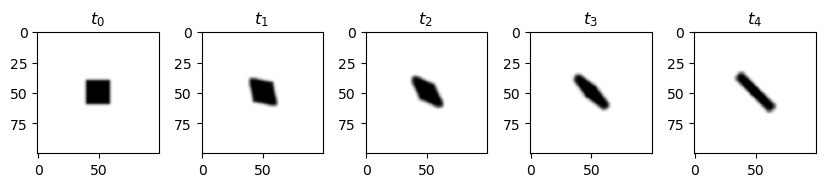

In [7]:
"""Time evolution:"""
plt.figure(figsize=(10,4))
ln = len(lddmm.Js0)
for a in range(ln):
    plt.subplot(1,ln+1,a+1)
    plt.imshow(lddmm.Js0[a], cmap="gray_r")
    plt.title(r"$t_{%d}$ " %(a))
plt.tight_layout()